In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.interpolate import interp1d
from scipy.optimize import root

In [2]:
common_settings = {
'omega_b':0.0223828,
'h':0.67810,
'z_reio':7.6711,
'YHe':0.25,
'perturbations_verbose':1,
'background_verbose':3,
'output':'mTk, vTk, mPk',
'gauge':'newtonian',
'P_k_max_1/Mpc':10,
'z_max_pk':1000,
'format':'class',

# 'omega_cdm':0.4363,
'omega_cdm':0.11,

}

In [3]:
chiCDM = Class()
# pass input parameters
Mnu=0.06
chiCDM.set(common_settings)
aNR=1/1890/Mnu+2.42e-3
# aNR=7.856e-03
print(f'aNR={aNR},zNR={1/aNR -1}')
chiCDM.set({
'N_ur': 3.046,
'omega_chi':0.00107363 ,
# 'omega_cdm':0.90,
# 'f_chi':0.1,
'acs_chi':aNR,
'cs2_peak_chi':1./3.
})

nuCDM = Class()
nuCDM.set(common_settings)
nuCDM.set({
 # class convention for N_ur (for 0, 1, 2 or 3 massive neutrinos, 3.046, 2.0328,
# 1.0196, 0.00641 respectively)
    'N_ur': 2.0328,
    'N_ncdm':1,
    'm_ncdm':Mnu,
})


chiCDM.compute()
nuCDM.compute()

aNR=0.011238342151675487,zNR=87.98109583279714
Running CLASS version v3.2.0
Computing background
Chose ndf15 as generic_evolver
 -> age = 14.024724 Gyr
 -> conformal age = 14522.420249 Mpc
 -> N_eff = 3.046 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3188.906765
    corresponding to conformal time = 120.369448 Mpc
 ---------------------------- Budget equation ----------------------- 
 ---> Nonrelativistic Species 
-> Bayrons                        Omega = 0.0486773       , omega = 0.0223828      
-> Cold Dark Matter               Omega = 0.239224        , omega = 0.11           
-> Dark Matter with sound speed:  Omega = 0.00233489      , omega = 0.00107363     
 ---> Relativistic Species 
-> Photons                        Omega = 5.37815e-05     , omega = 2.47298e-05    
-> Ultra-relativistic relics      Omega = 3.72044e-05     , omega = 1.71073e-05    
 ---> Other Content 
-> Cosmological Constant          Omega = 0.709673  

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_ncdm[0]', '(.)p_ncdm[0]', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])


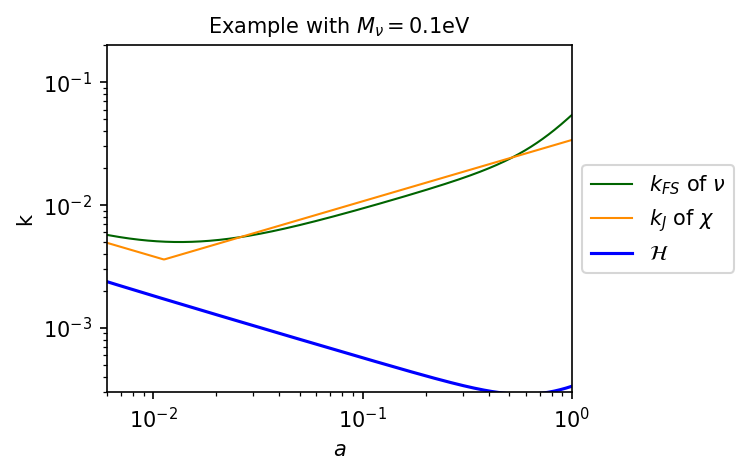

In [4]:
plt.figure(figsize=(4,3), dpi=150)

background = chiCDM.get_background() # load background table
a = 1/(background['z']+1) # read redshift
rho_cdm=background['(.)rho_cdm']
rho_chi=background['(.)rho_chi']
kJ_chi=background['(.)kJ_chi']

Ha=background['H [1/Mpc]']/(1.+background['z'])
Ha_chi_int=interp1d(a,Ha)

background = nuCDM.get_background() # load background table
background_a = 1/(background['z']+1) # read redshift
rho_nu=background['(.)rho_ncdm[0]']
rho_crit=background['(.)rho_crit']



plt.xlabel(r'$a $')
# plt.loglog(background_a,rho_cdm,label=r'CDM')
# plt.loglog(background_a,rho_chi,label=r'$\chi$')
# plt.loglog(background_a,rho_nu,label=r'rho_nu')

# compute kFS for neutrinos
h = chiCDM.h() # get reduced Hubble for conversions to 1/Mpc
background = nuCDM.get_background() # load background table
rho_nu=background['(.)rho_ncdm[0]']
p_nu=background['(.)p_ncdm[0]']
drho_nu_da = np.gradient(rho_nu, a)
dp_nu_da = np.gradient(p_nu, a)
cFS2_nu=dp_nu_da/drho_nu_da
Ha=background['H [1/Mpc]']/(1.+background['z'])
Ha_nu_int=interp1d(a,Ha)

print(background.keys())
k_FS_nu=np.sqrt(3/2)*Ha/h/(np.sqrt(cFS2_nu))

# plt.loglog(background_a,cFS2_nu,label=r'cFS')
plt.loglog(a,k_FS_nu,'darkgreen',label=r'$k_{FS}$ of $\nu$', linewidth=1)
plt.loglog(a,kJ_chi,'darkorange',label=r'$k_{J}$ of $\chi$', linewidth=1)

plt.loglog(a,Ha/h,'blue',label=r'$\mathcal{H}$')

# plt.axhline(y=0.02, color='k', linewidth=0.3)
# plt.axhline(y=0.05, color='k', linewidth=0.3)
# plt.axhline(y=0.13, color='k', linewidth=0.3)
# plt.axhline(y=0.36, color='k', linewidth=0.3)


plt.xlim([6.e-3,1])
plt.ylim([3.e-4,0.2])
plt.title(r'Example with $M_\nu=0.1\mathrm{eV}$', fontsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xscale('log')
plt.xlabel(r'$a$')
plt.ylabel(r'k')
# plt.savefig('/home/fverdian/class/soundspeed-scripts/figure/kFS_kF_Mnu01.pdf',bbox_inches='tight')
#
plt.show()

In [10]:
an1=10**-1.556
kj1=0.01
an2=10**-3.5559
print(an1,an2)
print(kj1*(an1/an2))
0.0321

0.027797132677592883 0.00027803533940870426
0.9997697679981561


In [14]:
print(a[-20])
kFS_ext = k_FS_nu[-20]*np.sqrt(a/a[-20])
kFS_inte = interp1d(a,kFS_ext)
# Define the equation to solve
def eqn(a):
    return kFS_inte(a)-3/np.sqrt(2)*(Ha_chi_int(a)/h)

# Solve the equation
solution = root(eqn, 1.e-2)  # 1 is the initial guess
print(f'a_* set by nus is={solution}')
a_star_nu=solution.x[0]

0.8152743294828694
a_* set by nus is= message: The solution converged.
 success: True
  status: 1
     fun: [-8.674e-19]
       x: [ 8.692e-03]
  method: hybr
    nfev: 19
    fjac: [[-1.000e+00]]
       r: [ 0.000e+00]
     qtf: [ 8.674e-19]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dict_keys(['k (h/Mpc)', 'd_g', 'd_b', 'd_cdm', 'd_ur', 'd_chi', 'd_m', 'd_tot', 'phi', 'psi', 't_g', 't_b', 't_cdm', 't_ur', 't_chi', 't_tot'])
Evaluating at k=0.487091


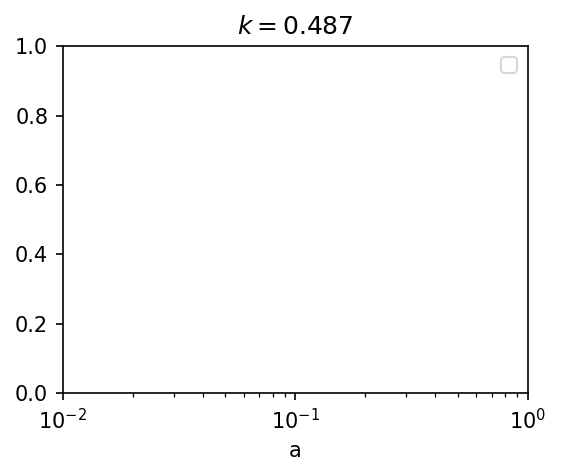

In [5]:
a_eval=np.logspace(-2.5,0,30)
chi_tk_z=[]
nu_tk_z=[]
for a in a_eval:
    chi_tk_z.append(chiCDM.get_transfer(z=1/a-1))
    nu_tk_z.append(nuCDM.get_transfer(z=1/a-1))
chi_tk_z=np.array(chi_tk_z)
nu_tk_z=np.array(nu_tk_z)


print(chi_tk_z[1].keys())
kidx=100
kEval=chi_tk_z[1]['k (h/Mpc)'][kidx]
print('Evaluating at k={:.6f}'.format(kEval))# print(tk['d_chi'].shape)

d_chi_z=-np.array([d['d_chi'][kidx] for d in chi_tk_z])
d_cdm_z=-np.array([d['d_cdm'][kidx] for d in chi_tk_z])
d_nu_z=-np.array([d['d_ncdm[0]'][kidx] for d in nu_tk_z])

chi_ratio=d_chi_z/d_cdm_z
nu_ratio=d_nu_z/d_cdm_z

plt.figure(figsize=(4,3), dpi=150)

# plt.plot(a_eval,chi_ratio,'r-o',label=r'$\delta_\chi / \delta_c$', markersize=2.)
# plt.plot(a_eval,nu_ratio,'g-o',label=r'$\delta_\nu / \delta_c$', markersize=2.)
plt.legend(loc='best')
plt.title(r'$k='+'{:.3f}'.format(kEval)+r'$')
plt.xlim([1.e-2,1])
plt.xscale('log')
plt.xlabel('a')
plt.show()

NameError: name 'chi_tk_z' is not defined

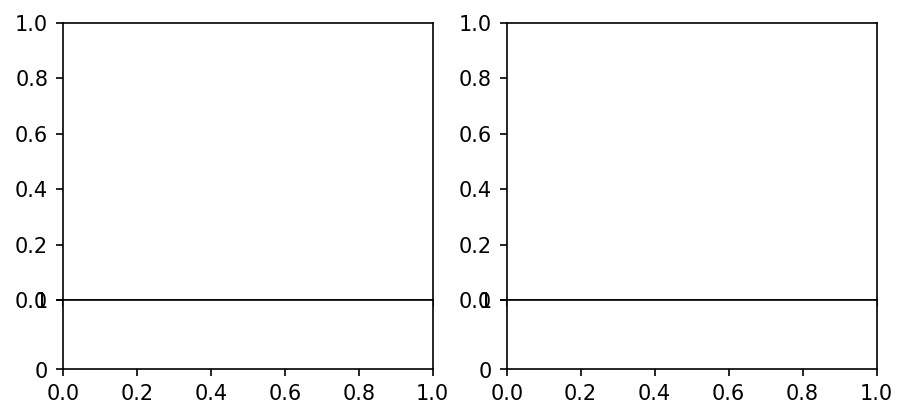

In [8]:
fig, axs = plt.subplots(2, 2, sharex=True,gridspec_kw={'height_ratios': [4,1]}, figsize=(7,3), dpi=150)
plt.subplots_adjust(hspace = 0)

# PLOT 1 ==========
kidx=30
kEval=chi_tk_z[1]['k (h/Mpc)'][kidx]
print('Evaluating at k={:.2f}'.format(kEval))# print(tk['d_chi'].shape)

d_chi_z=-np.array([d['d_chi'][kidx] for d in chi_tk_z])
d_cdm_z=-np.array([d['d_cdm'][kidx] for d in chi_tk_z])

d_nu_z=-np.array([d['d_ncdm[0]'][kidx] for d in nu_tk_z])

chi_ratio=d_chi_z/d_cdm_z
nu_ratio=d_nu_z/d_cdm_z


axs[0,0].plot(a_eval,chi_ratio,'r-o',label=r'$\delta_\chi / \delta_c$', markersize=2.)
axs[0,0].plot(a_eval,nu_ratio,'g-o',label=r'$\delta_\nu / \delta_c$', markersize=2.)

axs[1,0].loglog(a_eval,np.abs(chi_ratio/nu_ratio-1), 'maroon', label='Rel diff')

axs[0,0].legend(loc='best')
axs[0,0].set_xlim([1.e-2,1])
axs[0,0].set_xscale('log')
axs[1,0].set_xlabel('a')
axs[0,0].set_title(r'$k='+'{:.2f}'.format(kEval)+r'$')

# PLOT 2 ==========
kidx=35
kEval=chi_tk_z[1]['k (h/Mpc)'][kidx]
print('Evaluating at k={:.2f}'.format(kEval))# print(tk['d_chi'].shape)

d_chi_z=-np.array([d['d_chi'][kidx] for d in chi_tk_z])
d_cdm_z=-np.array([d['d_cdm'][kidx] for d in chi_tk_z])

d_nu_z=-np.array([d['d_ncdm[0]'][kidx] for d in nu_tk_z])

chi_ratio=d_chi_z/d_cdm_z
nu_ratio=d_nu_z/d_cdm_z


axs[0,1].plot(a_eval,chi_ratio,'r-o',label=r'$\delta_\chi / \delta_c$', markersize=2.)
axs[0,1].plot(a_eval,nu_ratio,'g-o',label=r'$\delta_\nu / \delta_c$', markersize=2.)

axs[1,1].loglog(a_eval,np.abs(chi_ratio/nu_ratio-1), 'maroon', label='Rel diff')

axs[0,1].legend(loc='best')
axs[0,1].set_xlim([1.e-2,1])
axs[0,1].set_xscale('log')
axs[1,1].set_xlabel('a')
axs[0,1].set_title(r'$k='+'{:.2f}'.format(kEval)+r'$')


# plt.savefig('/home/fverdian/class/soundspeed-scripts/figure/nu_chi_dTk.pdf',bbox_inches='tight')

plt.show()

----
Now as a function of k, at a fixed redshift

In [15]:
zeval = 0.5
k_vals = chiCDM.get_transfer(z=zeval)['k (h/Mpc)']
d_chi_k = chiCDM.get_transfer(z=zeval)['d_chi']
d_cdm_k = chiCDM.get_transfer(z=zeval)['d_cdm']

d_nu_z_k = nuCDM.get_transfer(z=zeval)['d_ncdm[0]']

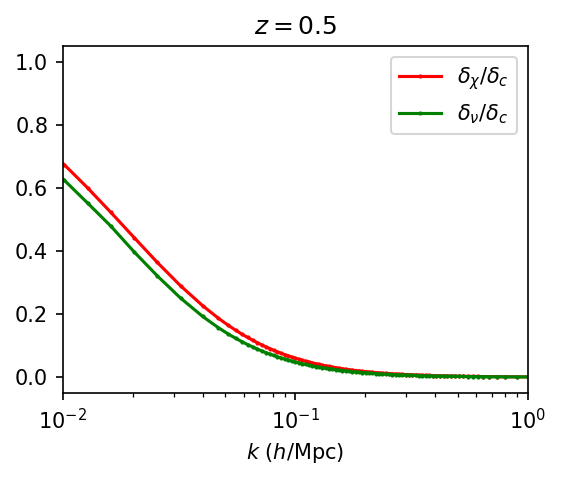

In [16]:
plt.figure(figsize=(4,3), dpi=150)

plt.plot(k_vals,d_chi_k/d_cdm_k,'r-o',label=r'$\delta_\chi / \delta_c$', markersize=1.)
plt.plot(k_vals,d_nu_z_k/d_cdm_k,'g-o',label=r'$\delta_\nu / \delta_c$', markersize=1.)
# plt.plot(k_vals,d_nu_z_k,'g-o',label=r'$\delta_{cdm} / \delta_c$', markersize=2.)

plt.legend(loc='best')
plt.title(r'$z='+'{:.1f}'.format(zeval)+r'$')
plt.xlim([1.e-2,1])
plt.xscale('log')
plt.xlabel(r'$k$ ($h$/Mpc)')
plt.show()

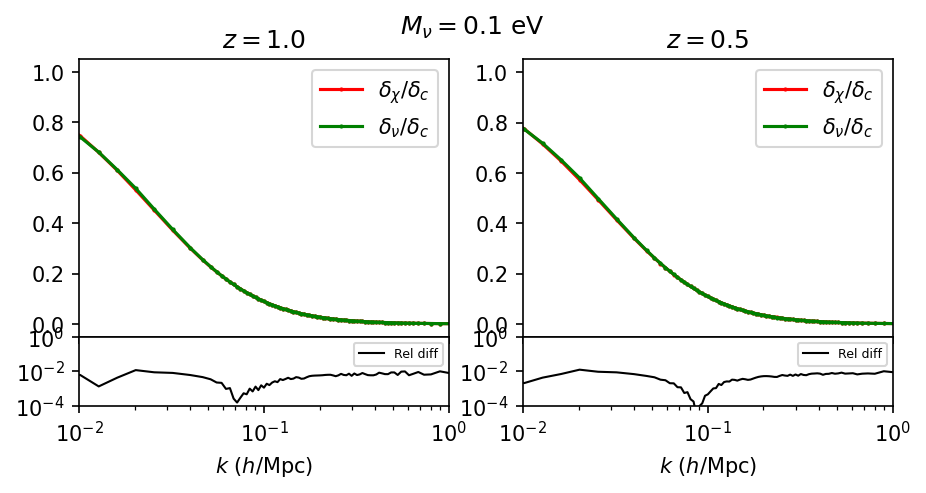

In [34]:
fig, axs = plt.subplots(2, 2, sharex=True,gridspec_kw={'height_ratios': [4,1]}, figsize=(7,3), dpi=150)
plt.subplots_adjust(hspace = 0)

# PLOT 1 ==========
zeval = 1.
k_vals = chiCDM.get_transfer(z=zeval)['k (h/Mpc)']
d_chi_k = chiCDM.get_transfer(z=zeval)['d_chi']
d_cdm_k = chiCDM.get_transfer(z=zeval)['d_cdm']

d_nu_z_k = nuCDM.get_transfer(z=zeval)['d_ncdm[0]']

axs[0,0].plot(k_vals,d_chi_k/d_cdm_k,'r-o',label=r'$\delta_\chi / \delta_c$', markersize=1.)
axs[0,0].plot(k_vals,d_nu_z_k/d_cdm_k,'g-o',label=r'$\delta_\nu / \delta_c$', markersize=1.)

axs[1,0].loglog(k_vals,np.abs(d_chi_k/d_nu_z_k-1), 'k', label='Rel diff', linewidth=1.)


axs[0,0].legend(loc='best')
axs[0,0].set_xlim([1.e-2,1])
axs[0,0].set_xscale('log')
axs[1,0].set_xlabel(r'$k$ ($h$/Mpc)')
axs[1,0].set_ylim([1.e-4,1])
axs[1,0].legend(loc='best', fontsize=6)
axs[0,0].set_title(r'$z='+'{:.1f}'.format(zeval)+r'$')

# PLOT 2 ==========
zeval = 0.5
k_vals = chiCDM.get_transfer(z=zeval)['k (h/Mpc)']
d_chi_k = chiCDM.get_transfer(z=zeval)['d_chi']
d_cdm_k = chiCDM.get_transfer(z=zeval)['d_cdm']

d_nu_z_k = nuCDM.get_transfer(z=zeval)['d_ncdm[0]']

axs[0,1].plot(k_vals,d_chi_k/d_cdm_k,'r-o',label=r'$\delta_\chi / \delta_c$', markersize=1.)
axs[0,1].plot(k_vals,d_nu_z_k/d_cdm_k,'g-o',label=r'$\delta_\nu / \delta_c$', markersize=1.)

axs[1,1].loglog(k_vals,np.abs(d_chi_k/d_nu_z_k-1), 'k', label='Rel diff', linewidth=1.)

axs[0,1].legend(loc='best')
axs[0,1].set_xlim([1.e-2,1])
axs[0,1].set_xscale('log')
axs[1,1].set_xlabel(r'$k$ ($h$/Mpc)')
axs[1,1].legend(loc='best', fontsize=6)

axs[1,1].set_ylim([1.e-4,1])

axs[0,1].set_title(r'$z='+'{:.1f}'.format(zeval)+r'$')

plt.suptitle(r'$M_\nu=0.1$ eV')
plt.savefig('/home/fverdian/class/soundspeed-scripts/figure/nu_chi_dTk_k.pdf',bbox_inches='tight')

plt.show()